In [1]:
import pandas as pd 
from datetime import datetime
import matplotlib.pylab as plt
import zipfile
import geopandas as gp
import pylab as pl 
from fiona.crs import from_epsg

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/tashaygreen/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
df = pd.read_csv('00JOIN_COM_VIO_CBG_WEEK.csv')

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['CBG'] = df['CBG'].astype(str)
df['Datetime']= pd.to_datetime(df.Date, format='%Y-%m-%d', errors='ignore')
df['Ratio'] = df['vio_count']/df['com_count']

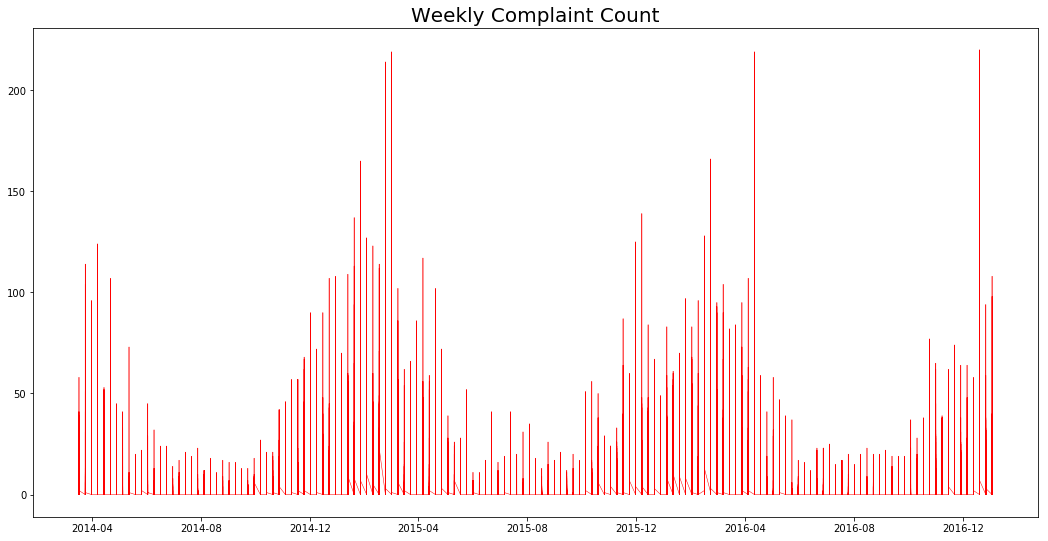

In [26]:
fig = plt.figure(figsize=(18, 9))
plt.plot(df['Date'], df['com_count'], linewidth=0.5, c='red')
plt.title('Weekly Complaint Count', size=20)

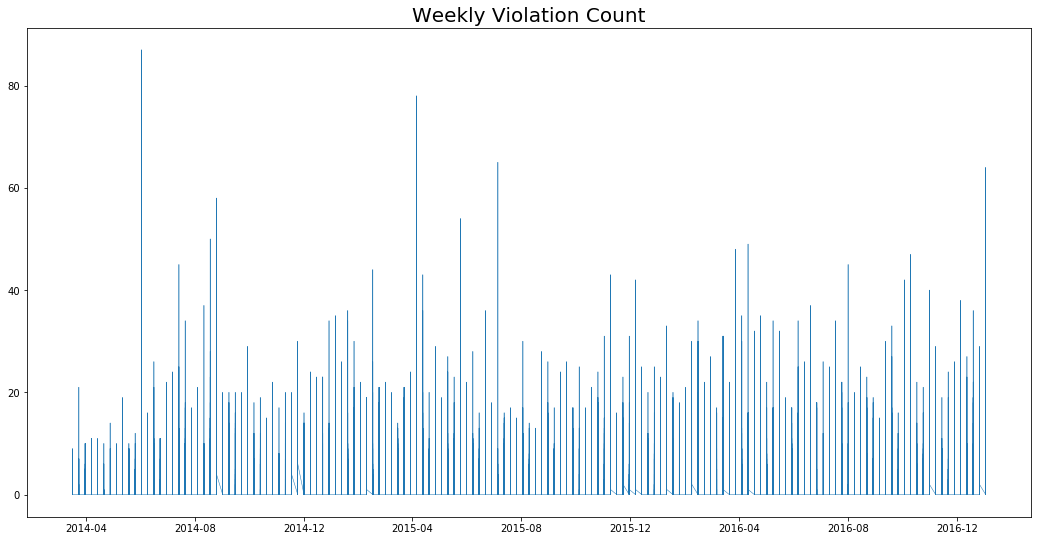

In [5]:
fig = plt.figure(figsize=(18, 9))
plt.plot(df['Date'], df['vio_count'], linewidth=0.5)
plt.title('Weekly Violation Count', size=20)

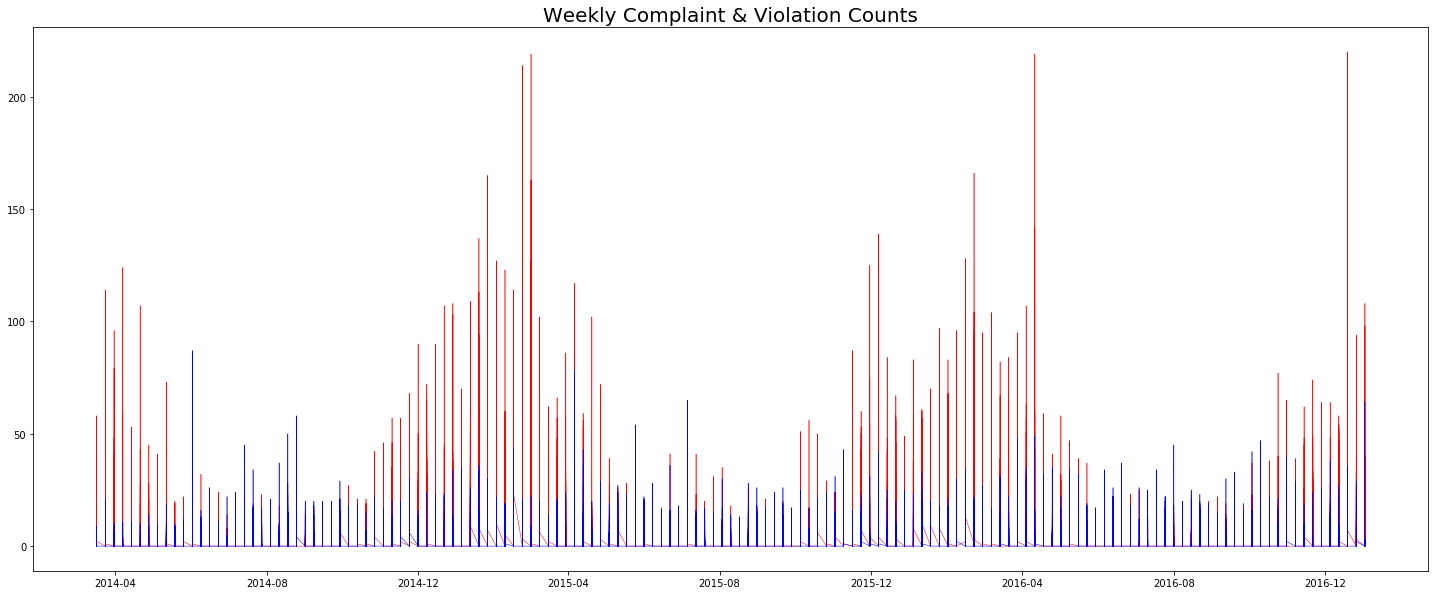

In [6]:
fig = plt.figure(figsize=(25, 10))
plt.plot(df['Date'], df['com_count'], color = 'red', linewidth=0.5)
plt.plot(df['Date'], df['vio_count'], color = 'blue', linewidth = 0.5)
plt.title('Weekly Complaint & Violation Counts', size=20)

### Shapefile

In [7]:
shape = gp.read_file('/Users/tashaygreen/Documents/CivAnalyticsFellow/cb_2015_36_bg_500k/cb_2015_36_bg_500k.shp')

In [8]:
shape['CBG'] = shape['GEOID'].astype(str)

### Segment the Data 

In [9]:
data2014 = df[df['Date'].isin(pd.date_range('2014-01-01', '2014-12-31'))]
data2015 = df[df['Date'].isin(pd.date_range('2015-01-01', '2015-12-31'))]
data2016 = df[df['Date'].isin(pd.date_range('2016-01-01', '2016-12-31'))]
data2017 = df[df['Date'].isin(pd.date_range('2017-01-01', '2017-12-31'))]

### 2014

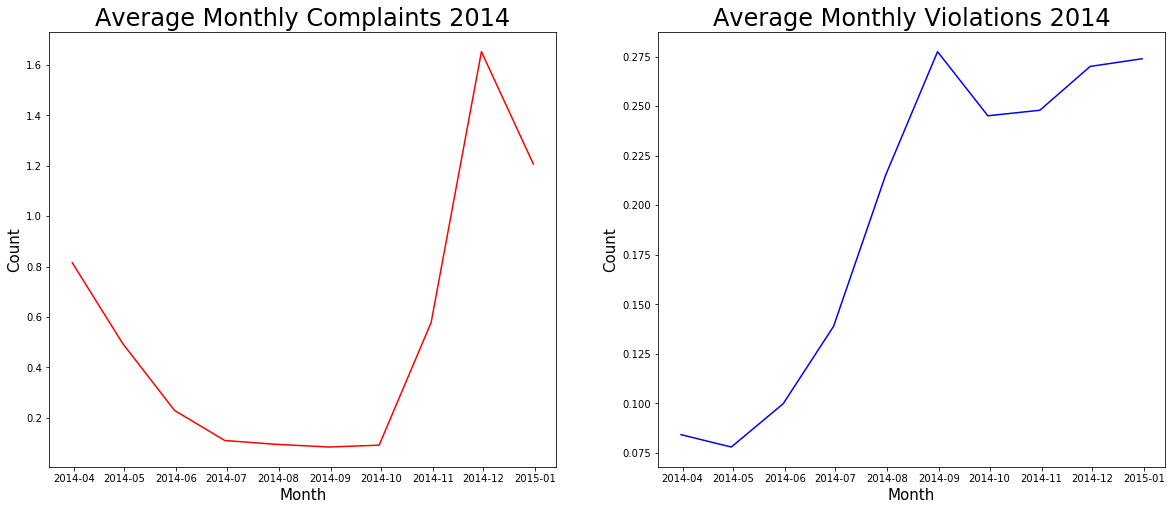

In [66]:
data2014.index = data2014['Datetime']

f, (ax1,ax2) = pl.subplots(1, 2, figsize=(20,8))

monthly_avg = data2014.resample('M').mean()
ax1.plot(monthly_avg.index, monthly_avg['com_count'], c='red')
ax1.set_title('Average Monthly Complaints 2014', size=24)
ax1.set_xlabel('Month', size=15)
ax1.set_ylabel('Count', size=15)

ax2.plot(monthly_avg.index, monthly_avg['vio_count'], c='blue')
ax2.set_title('Average Monthly Violations 2014', size=24)
ax2.set_xlabel('Month', size=15)
ax2.set_ylabel('Count', size=15)

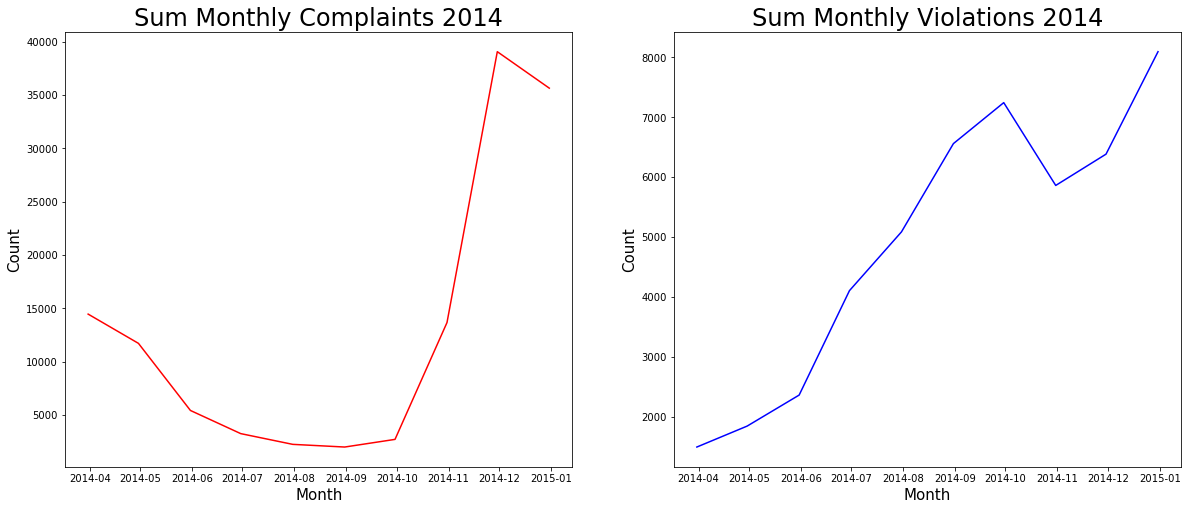

In [67]:
f, (ax1,ax2) = pl.subplots(1, 2, figsize=(20,8))

monthly_avg = data2014.resample('M').sum()
ax1.plot(monthly_avg.index, monthly_avg['com_count'], c='red')
ax1.set_title('Sum Monthly Complaints 2014', size=24)
ax1.set_xlabel('Month', size=15)
ax1.set_ylabel('Count', size=15)

ax2.plot(monthly_avg.index, monthly_avg['vio_count'], c='blue')
ax2.set_title('Sum Monthly Violations 2014', size=24)
ax2.set_xlabel('Month', size=15)
ax2.set_ylabel('Count', size=15)

#### Resample data to get com_count by CBG

In [12]:
resampled2014 = data2014.groupby(['CBG']).resample('M')['com_count'].sum()
#resampled2014 = data2014.groupby(['CBG']).resample('M')['com_count'].mean()
com_count_2014 = pd.DataFrame(resampled2014)
com_count_2014['CBG'] = com_count_2014.index.get_level_values(0)
com_count_2014['Datetime'] = com_count_2014.index.get_level_values(1)

In [13]:
#Re-merge shape file
com_count_2014 = shape.merge(com_count_2014, on='CBG')
com_count_2014 = com_count_2014.to_crs({'init': 'epsg:4326'}) 

In [14]:
mar = com_count_2014[(com_count_2014['Datetime'] == '2014-03-31') & (com_count_2014['com_count'] != 0)]
april = com_count_2014[(com_count_2014['Datetime'] == '2014-04-30') & (com_count_2014['com_count'] != 0)]
may = com_count_2014[(com_count_2014['Datetime'] == '2014-05-31') & (com_count_2014['com_count'] != 0)]
june = com_count_2014[(com_count_2014['Datetime'] == '2014-06-30')& (com_count_2014['com_count'] != 0)]
july = com_count_2014[(com_count_2014['Datetime'] == '2014-07-31') & (com_count_2014['com_count'] != 0)]
aug = com_count_2014[(com_count_2014['Datetime'] == '2014-08-31') & (com_count_2014['com_count'] != 0)]
sept = com_count_2014[(com_count_2014['Datetime'] == '2014-09-30') & (com_count_2014['com_count'] != 0)]
octo = com_count_2014[(com_count_2014['Datetime'] == '2014-10-31') & (com_count_2014['com_count'] != 0)]
nov = com_count_2014[(com_count_2014['Datetime'] == '2014-11-30') & (com_count_2014['com_count'] != 0)]
dec = com_count_2014[(com_count_2014['Datetime'] == '2014-12-31') & (com_count_2014['com_count'] != 0)]

(-74.283863299999993,
 -73.672806699999995,
 40.487360250000002,
 40.932238749999996)

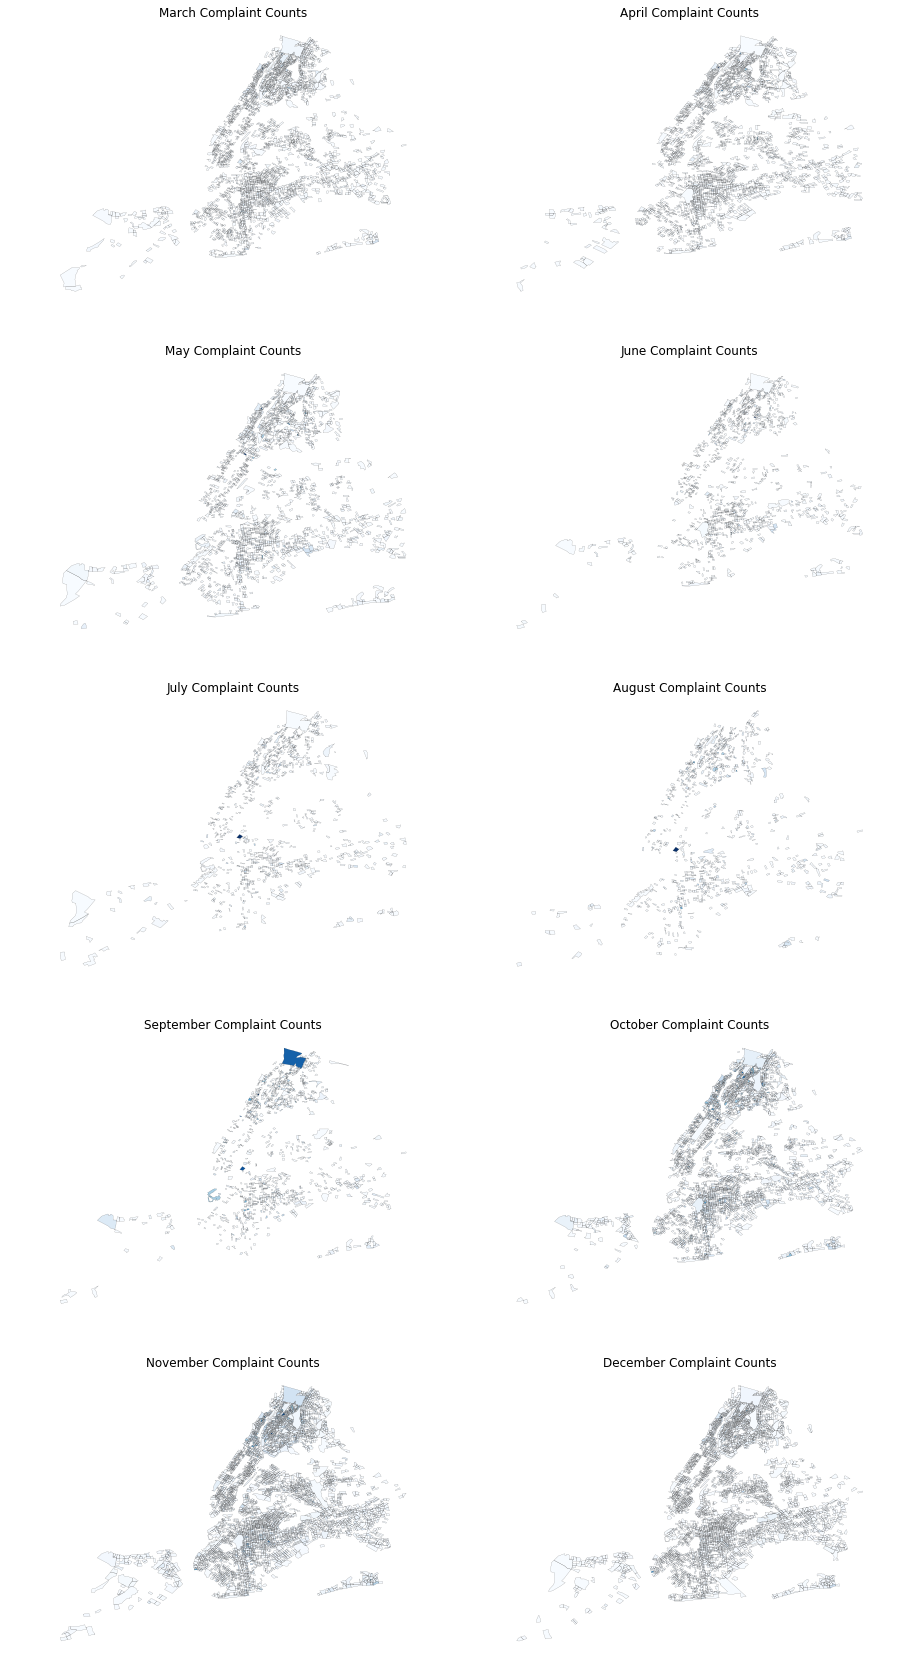

In [15]:
# Plot each month
f, ((ax1, ax2), (ax3, ax4), (ax5 , ax6), (ax7, ax8), (ax9, ax10)) = pl.subplots(5, 2, figsize=(15,30))
#ax.set_title('Complaint Counts per Month 2014')

mar.plot(column='com_count',cmap='Blues',alpha=1,linewidth=0.1, ax=ax1)
ax1.set_title('March Complaint Counts')
ax1.axis('off')

april.plot(column='com_count',cmap='Blues',alpha=1,linewidth=0.1,ax=ax2)
ax2.set_title('April Complaint Counts')
ax2.axis('off')

may.plot(column='com_count',cmap='Blues',alpha=1,linewidth=0.1, ax=ax3)
ax3.set_title('May Complaint Counts')
ax3.axis('off')

june.plot(column='com_count',cmap='Blues',alpha=1,linewidth=0.1, ax=ax4)
ax4.set_title('June Complaint Counts')
ax4.axis('off')

july.plot(column='com_count',cmap='Blues',alpha=1,linewidth=0.1,ax=ax5)
ax5.set_title('July Complaint Counts')
ax5.axis('off')

aug.plot(column='com_count',cmap='Blues',alpha=1,linewidth=0.1,ax=ax6)
ax6.set_title('August Complaint Counts')
ax6.axis('off')

sept.plot(column='com_count',cmap='Blues',alpha=1,linewidth=0.1, ax=ax7)
ax7.set_title('September Complaint Counts')
ax7.axis('off')

octo.plot(column='com_count',cmap='Blues',alpha=1,linewidth=0.1, ax=ax8)
ax8.set_title('October Complaint Counts')
ax8.axis('off')

nov.plot(column='com_count',cmap='Blues',alpha=1,linewidth=0.1, ax=ax9)
ax9.set_title('November Complaint Counts')
ax9.axis('off')

dec.plot(column='com_count',cmap='Blues',alpha=1,linewidth=0.1, ax=ax10)
ax10.set_title('December Complaint Counts')
ax10.axis('off')

### 2015

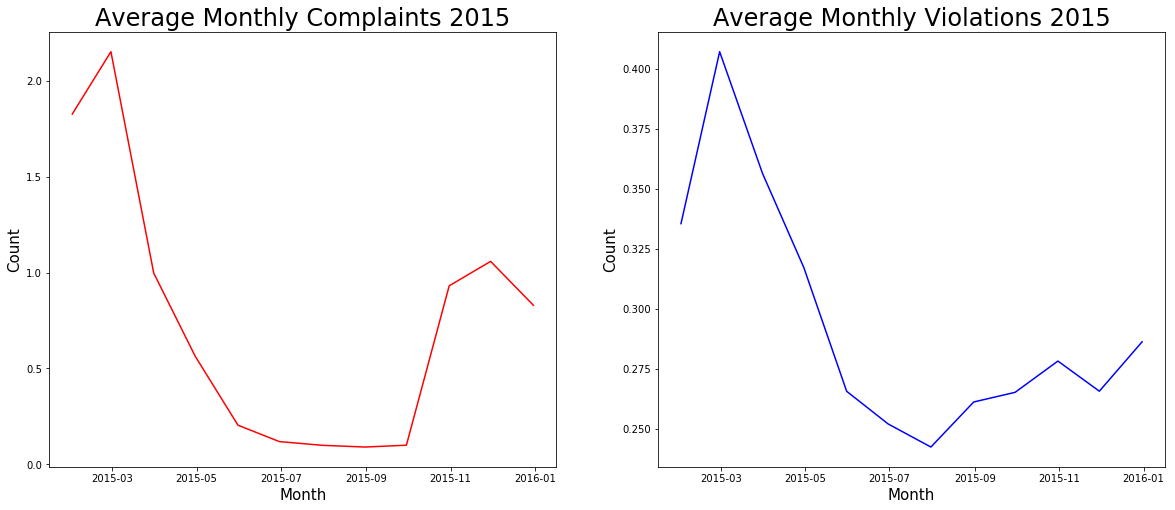

In [68]:
data2015.index = data2015['Datetime']

f, (ax1,ax2) = pl.subplots(1, 2, figsize=(20,8))

monthly_avg = data2015.resample('M').mean()
ax1.plot(monthly_avg.index, monthly_avg['com_count'], c='red')
ax1.set_title('Average Monthly Complaints 2015', size=24)
ax1.set_xlabel('Month', size=15)
ax1.set_ylabel('Count', size=15)

ax2.plot(monthly_avg.index, monthly_avg['vio_count'], c='blue')
ax2.set_title('Average Monthly Violations 2015', size=24)
ax2.set_xlabel('Month', size=15)
ax2.set_ylabel('Count', size=15)

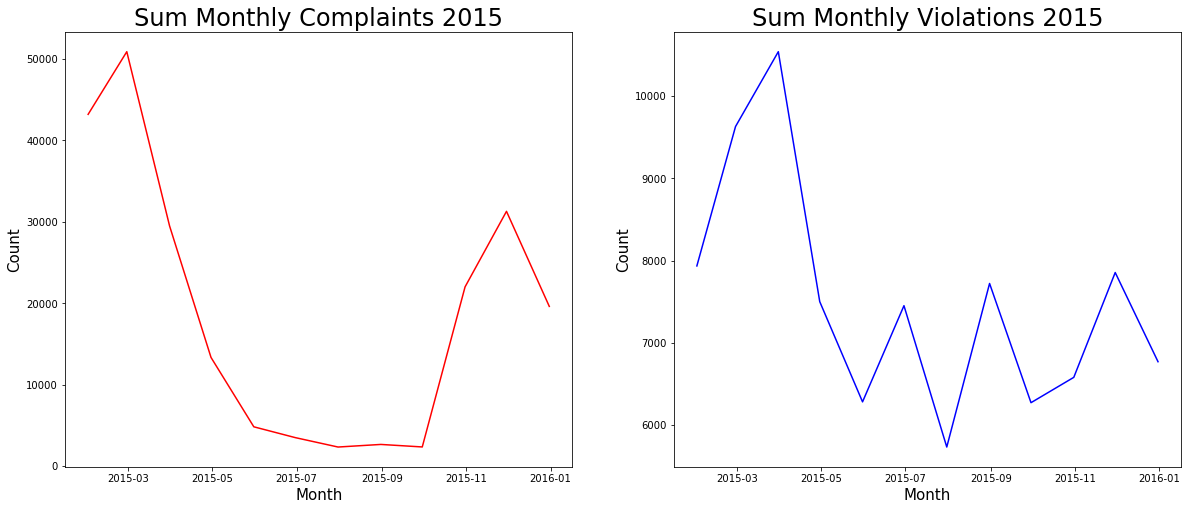

In [71]:
f, (ax1,ax2) = pl.subplots(1, 2, figsize=(20,8))

monthly_avg = data2015.resample('M').sum()
ax1.plot(monthly_avg.index, monthly_avg['com_count'], c='red')
ax1.set_title('Sum Monthly Complaints 2015', size=24)
ax1.set_xlabel('Month', size=15)
ax1.set_ylabel('Count', size=15)

ax2.plot(monthly_avg.index, monthly_avg['vio_count'], c='blue')
ax2.set_title('Sum Monthly Violations 2015', size=24)
ax2.set_xlabel('Month', size=15)
ax2.set_ylabel('Count', size=15)

### 2016

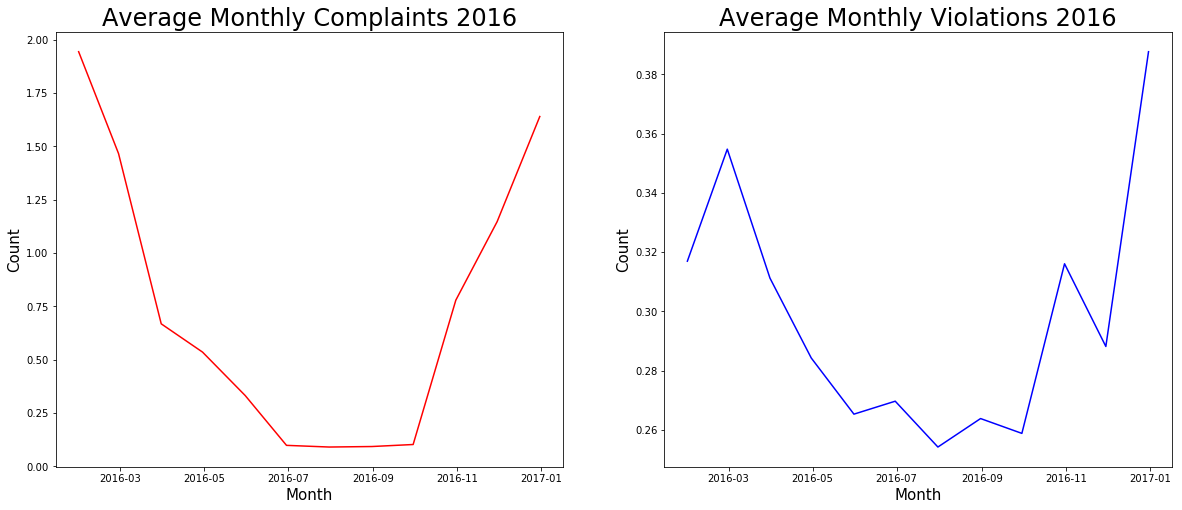

In [70]:
data2016.index = data2016['Datetime']

f, (ax1,ax2) = pl.subplots(1, 2, figsize=(20,8))

monthly_avg = data2016.resample('M').mean()
ax1.plot(monthly_avg.index, monthly_avg['com_count'], c='red')
ax1.set_title('Average Monthly Complaints 2016', size=24)
ax1.set_xlabel('Month', size=15)
ax1.set_ylabel('Count', size=15)

ax2.plot(monthly_avg.index, monthly_avg['vio_count'], c='blue')
ax2.set_title('Average Monthly Violations 2016', size=24)
ax2.set_xlabel('Month', size=15)
ax2.set_ylabel('Count', size=15)

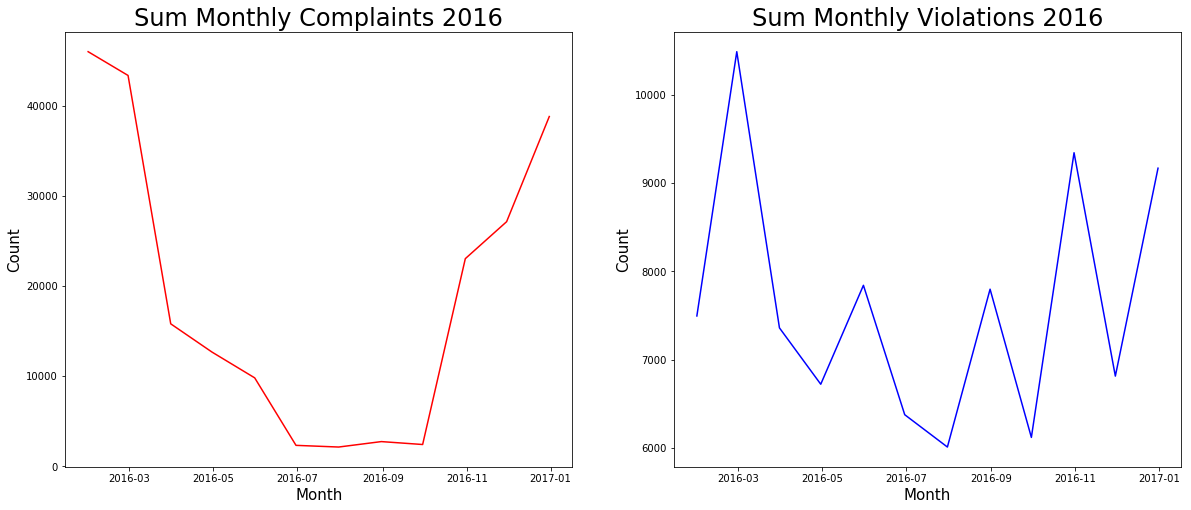

In [69]:
f, (ax1,ax2) = pl.subplots(1, 2, figsize=(20,8))

monthly_avg = data2016.resample('M').sum()
ax1.plot(monthly_avg.index, monthly_avg['com_count'], c='red')
ax1.set_title('Sum Monthly Complaints 2016', size=24)
ax1.set_xlabel('Month', size=15)
ax1.set_ylabel('Count', size=15)

ax2.plot(monthly_avg.index, monthly_avg['vio_count'], c='blue')
ax2.set_title('Sum Monthly Violations 2016', size=24)
ax2.set_xlabel('Month', size=15)
ax2.set_ylabel('Count', size=15)